In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("german_credit_data.csv", index_col=0)
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [4]:
# Check Null value present or not in dataset

df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [14]:
# Check which columns those are Categorical value

categorical_features = df.select_dtypes(include=[np.object]).columns
df[categorical_features]

<ipython-input-14-6db778ff8270>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = df.select_dtypes(include=[np.object]).columns


,Sex,Housing,Saving accounts,Checking account,Purpose,Risk
0,male,own,NaN,little,radio/TV,good
1,female,own,little,moderate,radio/TV,bad
2,male,own,little,NaN,education,good
3,male,free,little,little,furniture/equipment,good
4,male,free,little,little,car,bad
...,...,...,...,...,...,...
995,female,own,little,NaN,furniture/equipment,good
996,male,own,little,little,car,good
997,male,own,little,NaN,radio/TV,good
998,male,free,little,little,radio/TV,bad


In [6]:
#Unique value present in categorical attributes

cat_col = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']
for cols in cat_col:
    line=cat_col + " : "
for v in df[cat_col].unique():
    line=line + str(v) + " , "
display(line)

TypeError: can only concatenate list (not "str") to list

In [15]:
# Convert Categorical columns to Numerical value using LabelEncoder

# Here , Housing , Saving accounts , Checking account are the ordered value (Ordinal Value) 

# Attributes "" Saving accounts , Checking account " those value convert to Numerical value 

def SavingChecking_LabelEncoder(value):
    if value == "little":
        return 1
    elif value == "moderate":
        return 2
    elif value == "quite rich":
        return 3
    elif value == "rich":
        return 4
    else:
        return 0

In [16]:
df["Saving accounts"] = df["Saving accounts"].apply(SavingChecking_LabelEncoder)
df["Checking account"] = df["Checking account"].apply(SavingChecking_LabelEncoder)

In [17]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,0,1,1169,6,radio/TV,good
1,22,female,2,own,1,2,5951,48,radio/TV,bad
2,49,male,1,own,1,0,2096,12,education,good
3,45,male,2,free,1,1,7882,42,furniture/equipment,good
4,53,male,2,free,1,1,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,1,0,1736,12,furniture/equipment,good
996,40,male,3,own,1,1,3857,30,car,good
997,38,male,2,own,1,0,804,12,radio/TV,good
998,23,male,2,free,1,1,1845,45,radio/TV,bad


In [18]:
# Convert to Numerical Value

def House_LabelEncoder(value):
    if value == "free":
        return 0
    elif value == "rent":
        return 1
    elif value == "own":
        return 2

In [19]:
df["Housing"] = df["Housing"].apply(House_LabelEncoder)

In [20]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,2,0,1,1169,6,radio/TV,good
1,22,female,2,2,1,2,5951,48,radio/TV,bad
2,49,male,1,2,1,0,2096,12,education,good
3,45,male,2,0,1,1,7882,42,furniture/equipment,good
4,53,male,2,0,1,1,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,2,1,0,1736,12,furniture/equipment,good
996,40,male,3,2,1,1,3857,30,car,good
997,38,male,2,2,1,0,804,12,radio/TV,good
998,23,male,2,0,1,1,1845,45,radio/TV,bad


In [21]:
# Data Pre-processing For Discrete Categorical Columns (Sex,Purpose,Risk)

from sklearn.preprocessing import LabelEncoder
for col in ["Sex", "Purpose", "Risk"]:
    le = LabelEncoder()
    le.fit(df[col])
    df[col] = le.transform(df[col])

In [22]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,2,0,1,1169,6,5,1
1,22,0,2,2,1,2,5951,48,5,0
2,49,1,1,2,1,0,2096,12,3,1
3,45,1,2,0,1,1,7882,42,4,1
4,53,1,2,0,1,1,4870,24,1,0
...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,2,1,0,1736,12,4,1
996,40,1,3,2,1,1,3857,30,1,1
997,38,1,2,2,1,0,804,12,5,1
998,23,1,2,0,1,1,1845,45,5,0


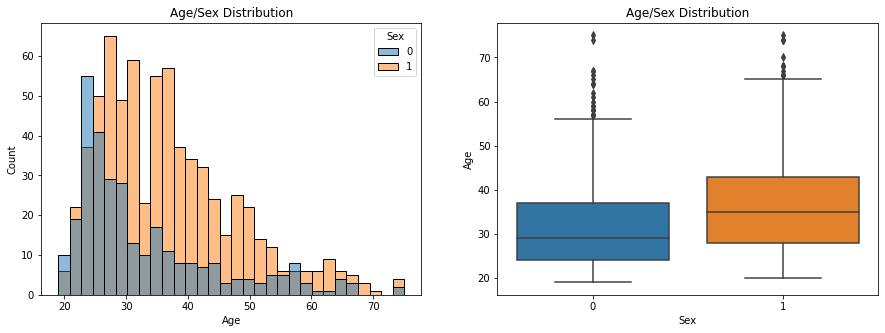

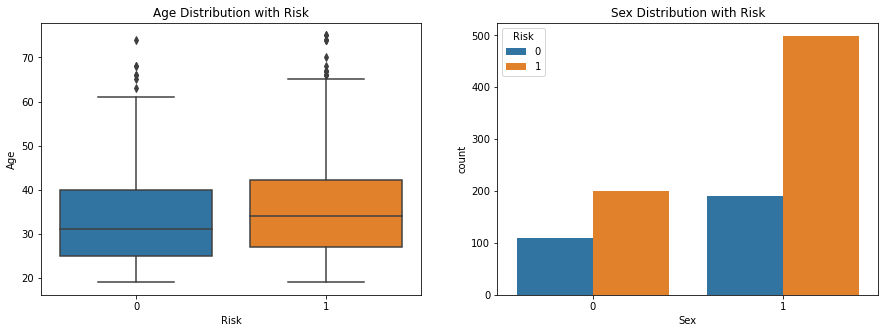

In [88]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.histplot(df, x='Age', bins=30, hue="Sex", ax=ax[0]).set_title("Age/Sex Distribution");
sns.boxplot(data=df, x="Sex", y="Age", ax=ax[1]).set_title("Age/Sex Distribution");

fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(data=df, x='Risk', y='Age', ax=ax[0]).set_title("Age Distribution with Risk");
sns.countplot(data=df, x="Sex", hue="Risk", ax=ax[1]).set_title("Sex Distribution with Risk");

##### Age does not affect the risk rating much
Males take more count of credit from Bank

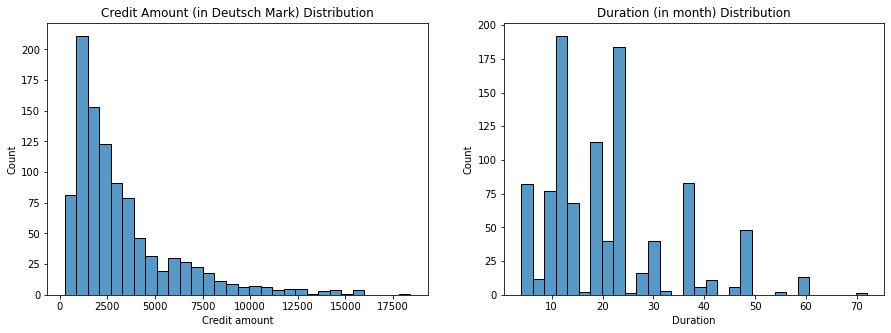

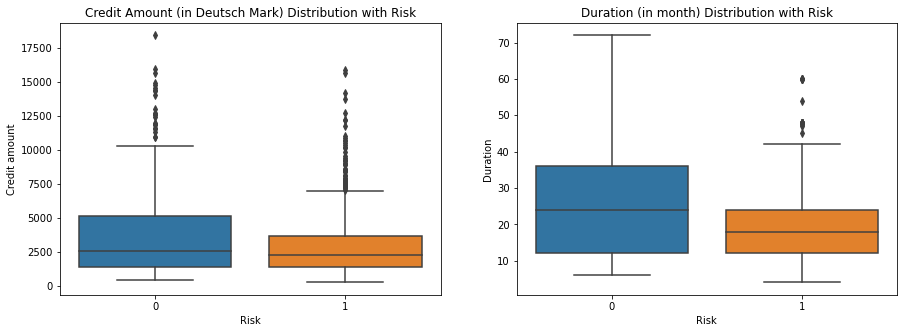

In [90]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.histplot(df, x='Credit amount', bins=30, ax=ax[0]).set_title("Credit Amount (in Deutsch Mark) Distribution");
sns.histplot(df, x='Duration', bins=30, ax=ax[1]).set_title("Duration (in month) Distribution");

fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(data=df, x='Risk', y='Credit amount', ax=ax[0]).set_title("Credit Amount (in Deutsch Mark) Distribution with Risk");
sns.boxplot(data=df, x='Risk', y='Duration', ax=ax[1]).set_title("Duration (in month) Distribution with Risk");

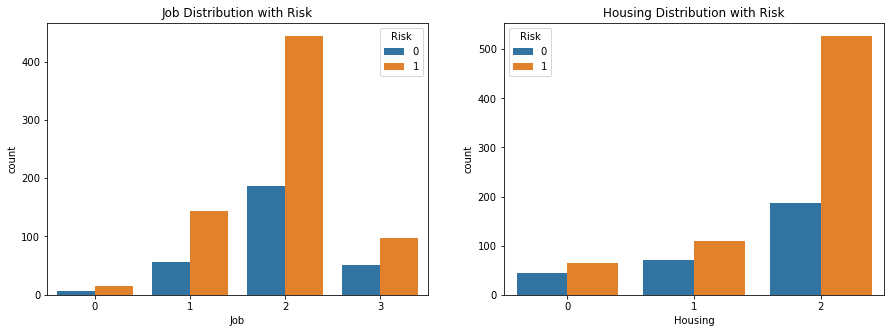

In [91]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(data=df, x="Job", hue="Risk", ax=ax[0]).set_title("Job Distribution with Risk");
sns.countplot(data=df, x="Housing", hue="Risk", ax=ax[1]).set_title("Housing Distribution with Risk");

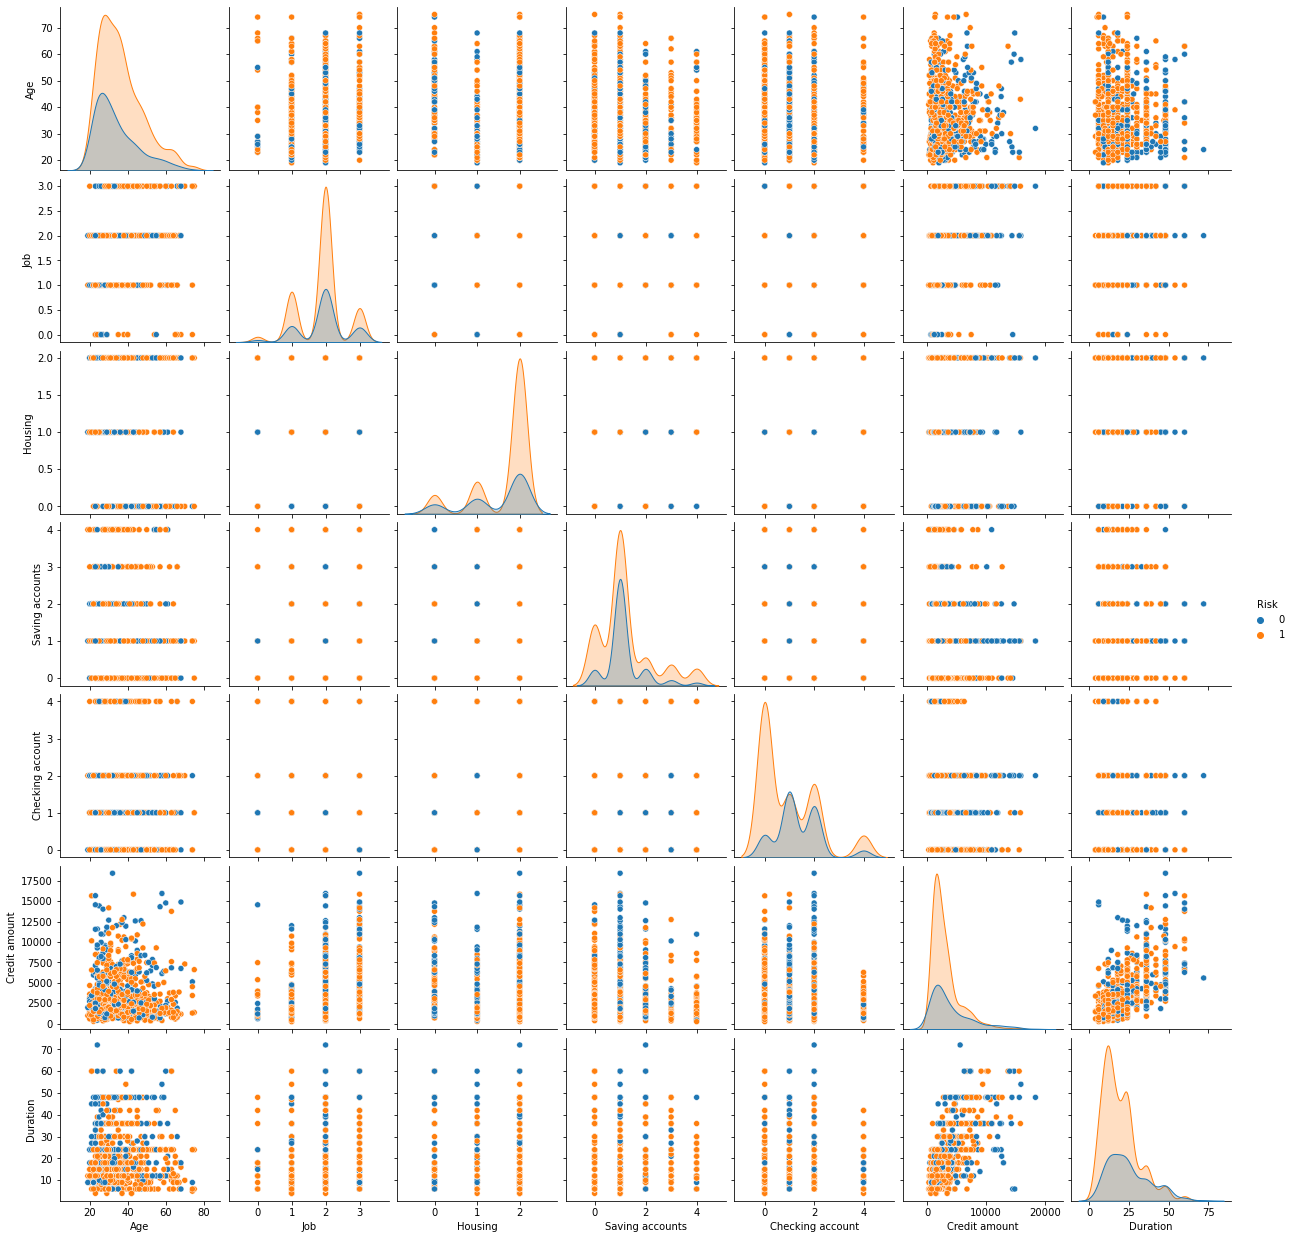

In [93]:
sns.pairplot(df[['Age', 'Job', 'Housing', 'Saving accounts','Checking account', 'Credit amount', 'Duration', "Risk"]], hue="Risk");

In [23]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,2,0,1,1169,6,5,1
1,22,0,2,2,1,2,5951,48,5,0
2,49,1,1,2,1,0,2096,12,3,1
3,45,1,2,0,1,1,7882,42,4,1
4,53,1,2,0,1,1,4870,24,1,0
...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,2,1,0,1736,12,4,1
996,40,1,3,2,1,1,3857,30,1,1
997,38,1,2,2,1,0,804,12,5,1
998,23,1,2,0,1,1,1845,45,5,0


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

predictors = df.drop(['Risk'],axis='columns')
target=df['Risk']

predictors_train,predictors_test,target_train,target_test=train_test_split(predictors,target,test_size=0.2,random_state=100)
dtree_entropy=DecisionTreeClassifier(criterion='entropy',random_state=100,max_depth=3,min_samples_leaf=1)

model=dtree_entropy.fit(predictors_train,target_train)

prediction=dtree_entropy.predict(predictors_test)

acc=accuracy_score(target_test,prediction,normalize=True)
print(acc)

0.72


In [74]:
from sklearn.model_selection import train_test_split


X = df.drop(['Risk'],axis='columns')
y = df['Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINING RESULTS: \n")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [76]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=1500, random_state=42)
bagging_clf.fit(X_train, y_train)

evaluate(bagging_clf, X_train, X_test, y_train, y_test)

TRAINING RESULTS: 

CONFUSION MATRIX:
[[209   0]
 [  0 491]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    209.0  491.0       1.0      700.0         700.0
TESTING RESULTS: 

CONFUSION MATRIX:
[[ 36  55]
 [ 25 184]]
ACCURACY SCORE:
0.7333
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.590164    0.769874  0.733333    0.680019      0.715362
recall      0.395604    0.880383  0.733333    0.637994      0.733333
f1-score    0.473684    0.821429  0.733333    0.647556      0.715946
support    91.000000  209.000000  0.733333  300.000000    300.000000


In [37]:
roc_auc_score

<function sklearn.metrics._ranking.roc_auc_score(y_true, y_score, *, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)>

In [94]:
from sklearn.metrics import roc_curve, roc_auc_score
y_proba1 = bagging_clf.predict_proba(X_test)[:,1]
roc_auc_score(y_test, bagging_clf.predict_proba(X_test)[:,1],average='macro')

0.7213313002786688

No handles with labels found to put in legend.


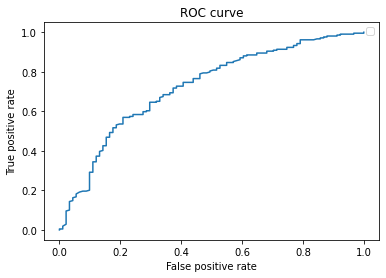

In [100]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba1)
plt.plot(fpr, tpr)

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()   

In [101]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42, n_estimators=1000)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINING RESULTS: 

CONFUSION MATRIX:
[[209   0]
 [  0 491]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    209.0  491.0       1.0      700.0         700.0
TESTING RESULTS: 

CONFUSION MATRIX:
[[ 29  62]
 [ 18 191]]
ACCURACY SCORE:
0.7333
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.617021    0.754941  0.733333    0.685981      0.713105
recall      0.318681    0.913876  0.733333    0.616278      0.733333
f1-score    0.420290    0.826840  0.733333    0.623565      0.703520
support    91.000000  209.000000  0.733333  300.000000    300.000000


In [103]:
from sklearn.metrics import roc_curve, roc_auc_score
y_proba2 = rf_clf.predict_proba(X_test)[:,1]
roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:,1],average='macro')

0.7366054997633945

No handles with labels found to put in legend.


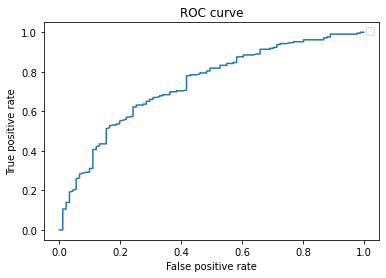

In [104]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba2)
plt.plot(fpr, tpr)

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()   

In [105]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(n_estimators=30)
ada_boost_clf.fit(X_train, y_train)
evaluate(ada_boost_clf, X_train, X_test, y_train, y_test)

TRAINING RESULTS: 

CONFUSION MATRIX:
[[102 107]
 [ 45 446]]
ACCURACY SCORE:
0.7829
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.693878    0.806510  0.782857    0.750194      0.772881
recall       0.488038    0.908350  0.782857    0.698194      0.782857
f1-score     0.573034    0.854406  0.782857    0.713720      0.770396
support    209.000000  491.000000  0.782857  700.000000    700.000000
TESTING RESULTS: 

CONFUSION MATRIX:
[[ 27  64]
 [ 23 186]]
ACCURACY SCORE:
0.7100
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.540000    0.744000      0.71    0.642000      0.682120
recall      0.296703    0.889952      0.71    0.593328      0.710000
f1-score    0.382979    0.810458      0.71    0.596718      0.680789
support    91.000000  209.000000      0.71  300.000000    300.000000


In [107]:
from sklearn.metrics import roc_curve, roc_auc_score
y_proba3 = ada_boost_clf.predict_proba(X_test)[:,1]
roc_auc_score(y_test, ada_boost_clf.predict_proba(X_test)[:,1],average='macro')

0.7074767337925233

No handles with labels found to put in legend.


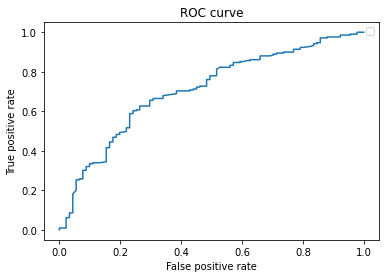

In [108]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba3)
plt.plot(fpr, tpr)

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()   

In [109]:
from xgboost import XGBClassifier

grad_boost_clf = XGBClassifier(n_estimators=100, random_state=42)
grad_boost_clf.fit(X_train, y_train)
evaluate(grad_boost_clf, X_train, X_test, y_train, y_test)

C:\Users\souvik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:56:11] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
TRAINING RESULTS: 

CONFUSION MATRIX:
[[208   1]
 [  0 491]]
ACCURACY SCORE:
0.9986
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    1.000000    0.997967  0.998571    0.998984      0.998574
recall       0.995215    1.000000  0.998571    0.997608      0.998571
f1-score     0.997602    0.998983  0.998571    0.998292      0.998570
support    209.000000  491.000000  0.998571  700.000000    700.000000
TESTING RESULTS: 

CONFUSION MATRIX:
[[ 45  46]
 [ 25 184]]
ACCURACY SCORE:
0.7633
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.642857    0.800000  0.763333    0.721429      0.752333
recall    

In [111]:
from sklearn.metrics import roc_curve, roc_auc_score
y_proba4 = grad_boost_clf.predict_proba(X_test)[:,1]
roc_auc_score(y_test, grad_boost_clf.predict_proba(X_test)[:,1],average='macro')

0.7337925232662075

No handles with labels found to put in legend.


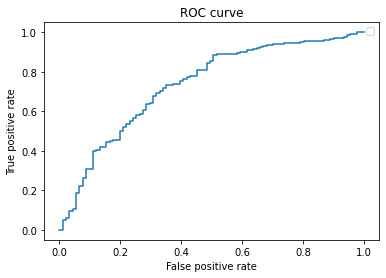

In [112]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba4)
plt.plot(fpr, tpr)

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()  